<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

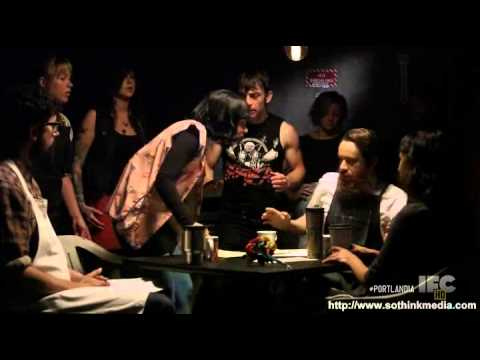

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/samuel/Programming/GitHub/Lambda School/Assignments/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [151]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)

print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## Questions to consider:

* Were the reviews generally positive or negative
 - for the entire set of coffee shops?
 
* What were the most common non-stop words found
 - in the reviews as a whole?
 - in positive reviews as a whole?
 - in negative reviews as a whole?
 
* Apllying the same as above, but with lemmatization.

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [152]:
# Were the reviews generally positive or negative
# for the entire set of coffee shops?

ratings = {" 5.0 star rating " : 5,
           " 4.0 star rating " : 4,
           " 3.0 star rating " : 3,
           " 2.0 star rating " : 2,
           " 1.0 star rating " : 1}

shops = shops.replace({"star_rating" : ratings})
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4


In [153]:
print(shops.star_rating.value_counts())

print("\n")
print("Positive Reviews: ",
      shops.star_rating.value_counts()[5] + shops.star_rating.value_counts()[4])
print("Negative Reviews: ",
      shops.star_rating.value_counts()[3] + shops.star_rating.value_counts()[2] + shops.star_rating.value_counts()[1])

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64


Positive Reviews:  6140
Negative Reviews:  1476


*From the above, we can see that the reviews were generally positive for the coffee shops as a whole.*

In [165]:
import spacy

# Analysis by way of removing custom stop words.

nlp = spacy.load("en_core_web_lg")

new_stop_words = [" ", "coffee", "it's", "1", "i'm", "i've", "coffee,", "got",
                  "it.", "shop", "you're", "there's", "coffee.", "-",
                 "place", "come"]

STOP_WORDS = nlp.Defaults.stop_words.union(new_stop_words)

In [230]:
# Note that this and all following for loops
# combine stop word removal with lemmatization.

from spacy.tokenizer import Tokenizer

tokenizer = Tokenizer(nlp.vocab)

# Tokenizer pipe

tokens = []

for doc in tokenizer.pipe(shops["full_review_text"]):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (token.pos_ != "PRON"):
            doc_tokens.append(token.lemma_.lower())
        
    tokens.append(doc_tokens)
    
shops["tokens"] = tokens

In [156]:
from collections import Counter

# From the lecture notes

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [231]:
# Not sure why don't is not
# fixed by the lemmatization,
# curious...

wc = count(shops["tokens"])
wc.head(30)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
97,great,2454,3272,1.0,0.008826,0.008826,0.322216
176,like,2166,3147,2.0,0.008489,0.017315,0.284401
38,check-in,2979,2991,3.0,0.008068,0.025383,0.391150
154,good,2158,2896,4.0,0.007812,0.033195,0.283351
6,love,1689,2161,5.0,0.005829,0.039024,0.221770
136,try,1522,1894,6.0,0.005109,0.044133,0.199842
30,order,1284,1806,7.0,0.004872,0.049004,0.168592
572,time,1334,1690,8.0,0.004559,0.053563,0.175158
18,drink,1237,1654,9.0,0.004462,0.058025,0.162421
744,little,1230,1479,10.0,0.003990,0.062014,0.161502


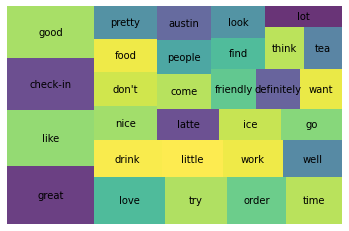

In [232]:
import squarify
import matplotlib.pyplot as plt

wc_top30 = wc[wc["rank"] <= 30]

squarify.plot(sizes=wc_top30["pct_total"], label=wc_top30["word"], alpha=0.8)
plt.axis("off")
plt.show()

In [227]:
# Good Coffee Shop Review Word Frequency

shops_good = shops.loc[shops.star_rating >= 4]
shops_good.shape

(6140, 4)

In [233]:
new_stop_words = [" ", "coffee", "it's", "1", "i'm", "i've", "coffee,", "got",
                  "it.", "shop", "you're", "there's", "coffee.", "-",
                 "place", "come", "&"]

STOP_WORDS = nlp.Defaults.stop_words.union(new_stop_words)

tokens_good = []

for doc in tokenizer.pipe(shops_good["full_review_text"]):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (token.pos_ != "PRON"):
            doc_tokens.append(token.lemma_.lower())
        
    tokens_good.append(doc_tokens)
    
shops_good["tokens"] = tokens_good

/Users/samuel/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [235]:
wc_good = count(shops_good["tokens"])
print(wc_good.shape)
wc_good.head(30)

(31804, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
97,great,2186,2919,1.0,0.010119,0.010119,0.356026
38,check-in,2521,2532,2.0,0.008778,0.018897,0.410586
316,good,1706,2272,3.0,0.007876,0.026773,0.277850
233,like,1595,2259,4.0,0.007831,0.034605,0.259772
6,love,1488,1918,5.0,0.006649,0.041254,0.242345
136,try,1211,1511,6.0,0.005238,0.046492,0.197231
441,time,1014,1248,7.0,0.004326,0.050818,0.165147
572,little,1027,1230,8.0,0.004264,0.055083,0.167264
18,drink,959,1226,9.0,0.004250,0.059333,0.156189
30,order,903,1185,10.0,0.004108,0.063441,0.147068


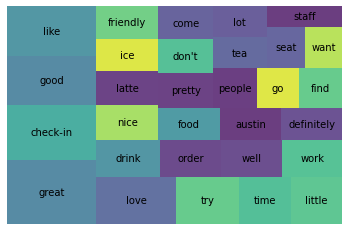

In [236]:
# Considering that most of the reviews were positive,
# these words do not differ signifigantly between
# the set of all coffee shops reviewed.

wc_good_top30 = wc_good[wc_good["rank"] <= 30]

squarify.plot(sizes=wc_good_top30["pct_total"], label=wc_good_top30["word"], alpha=0.8)
plt.axis("off")
plt.show()

In [172]:
# Bad Coffee Shop Review Word Frequency

shops_bad = shops.loc[shops.star_rating <= 3]
shops_bad.shape

(1476, 4)

In [237]:
new_stop_words = [" ", "coffee", "it's", "1", "i'm", "i've", "coffee,", "got",
                  "it.", "shop", "you're", "there's", "coffee.", "-",
                 "place", "come", "&"]

STOP_WORDS = nlp.Defaults.stop_words.union(new_stop_words)

tokens_bad = []

for doc in tokenizer.pipe(shops_bad["full_review_text"]):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (token.pos_ != "PRON"):
            doc_tokens.append(token.text.lower())
        
    tokens_bad.append(doc_tokens)
    
shops_bad["tokens"] = tokens_bad

/Users/samuel/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [239]:
# Hmm... it seems that lemmatization
# still fails, perhaps on purpose
# to appropriately alter the words
# with apostraphes.

wc_bad = count(shops_bad["tokens"])
print(wc_bad.shape)
wc_bad.head(30)

(16319, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
28,like,548,834,1.0,0.010138,0.010138,0.371274
6,good,441,599,2.0,0.007281,0.017420,0.298780
198,don't,340,430,3.0,0.005227,0.022647,0.230352
168,food,266,369,4.0,0.004486,0.027132,0.180217
140,check-in,359,359,5.0,0.004364,0.031496,0.243225
223,time,264,351,6.0,0.004267,0.035763,0.178862
125,pretty,278,349,7.0,0.004242,0.040005,0.188347
83,great,264,348,8.0,0.004230,0.044236,0.178862
511,people,247,327,9.0,0.003975,0.048211,0.167344
13,service,261,314,10.0,0.003817,0.052028,0.176829


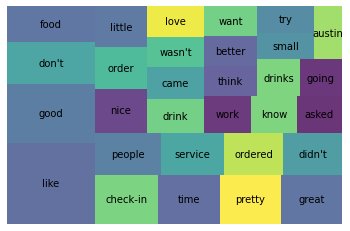

In [240]:
# Once again, these words don't differ too signifigantly
# from those of the general and positive reviews with the 
# exception of negating words such as wasn't and didn't,
# and a doubling of the word don't.

wc_bad_top30 = wc_bad[wc_bad["rank"] <= 30]

squarify.plot(sizes=wc_bad_top30["pct_total"], label=wc_bad_top30["word"], alpha=0.8)
plt.axis("off")
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [241]:
# Comparing word frequency between
# the good and bad DataFrames
# Using custom stop word removal.

wc_comparison = wc_good.merge(wc_bad, on="word")
print(wc_comparison.shape)
wc_comparison.head()

# Here columns ending in x are the counts from the wc_good set,
# and the columns ending in y are the counts from the wc_bad set.

(9048, 13)


,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y
0,great,2186,2919,1.0,0.010119,0.010119,0.356026,264,348,8.0,0.004230,0.044236,0.178862
1,check-in,2521,2532,2.0,0.008778,0.018897,0.410586,359,359,5.0,0.004364,0.031496,0.243225
2,good,1706,2272,3.0,0.007876,0.026773,0.277850,441,599,2.0,0.007281,0.017420,0.298780
3,like,1595,2259,4.0,0.007831,0.034605,0.259772,548,834,1.0,0.010138,0.010138,0.371274
4,love,1488,1918,5.0,0.006649,0.041254,0.242345,171,202,19.0,0.002456,0.078759,0.115854


In [242]:
wc_comparison["diff_pct_total"] = wc_comparison["pct_total_x"].values - wc_comparison["pct_total_y"].values
wc_comparison.head()

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y,diff_pct_total
0,great,2186,2919,1.0,0.010119,0.010119,0.356026,264,348,8.0,0.004230,0.044236,0.178862,0.005889
1,check-in,2521,2532,2.0,0.008778,0.018897,0.410586,359,359,5.0,0.004364,0.031496,0.243225,0.004414
2,good,1706,2272,3.0,0.007876,0.026773,0.277850,441,599,2.0,0.007281,0.017420,0.298780,0.000595
3,like,1595,2259,4.0,0.007831,0.034605,0.259772,548,834,1.0,0.010138,0.010138,0.371274,-0.002307
4,love,1488,1918,5.0,0.006649,0.041254,0.242345,171,202,19.0,0.002456,0.078759,0.115854,0.004194


In [243]:
differences = wc_comparison[["word", "diff_pct_total"]]
differences.head()

,word,diff_pct_total
0,great,0.005889
1,check-in,0.004414
2,good,0.000595
3,like,-0.002307
4,love,0.004194


In [244]:
# Interestingly, since I ran this code before going back
# and adding lemmatization to the for loops above,
# lemmatization seems to have done its job by taking
# different forms of the same word and grouping them together,
# thus increasing the frequency of each token or lemma signifigantly
# in some places.

top_ten = differences.sort_values(by="diff_pct_total", ascending=False).head(10)
top_ten

,word,diff_pct_total
0,great,0.005889
1,check-in,0.004414
4,love,0.004194
5,try,0.003111
13,ice,0.002886
24,seat,0.002638
31,park,0.002242
14,friendly,0.001999
43,bite,0.001964
37,delicious,0.001889


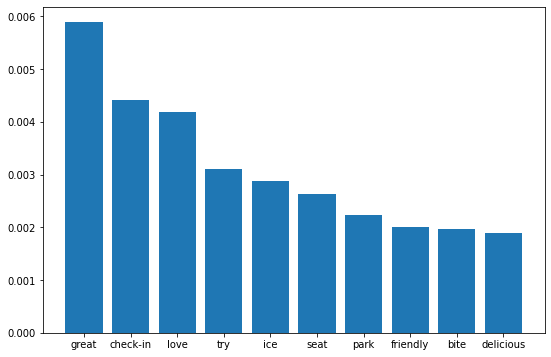

In [245]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes()

ax.bar(top_ten.word, top_ten.diff_pct_total);

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 